Wine dataset is composed by 178 instances
Each instance is divided in 13 attributes
There are 3 different classes
There are 0 null values

Class distribution

  Target_name  Total
0     class_0     59
1     class_1     71
2     class_2     48




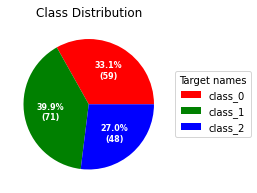

In [56]:
# Load Wine dataset (scikit library)

from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


dataset = load_wine()
attributes = pd.DataFrame(dataset.data)
targets = pd.Series(dataset.target)
target_names = pd.Series(dataset.target_names)
target_counts = pd.DataFrame({'Target_name':target_names, 'Total':targets.value_counts(sort=False)})

# Analyze data

print("Wine dataset is composed by " + str(attributes.shape[0]) + " instances")
print("Each instance is divided in " + str(attributes.shape[1]) + " attributes")
print("There are " + str(targets.unique().size) + " different classes")
print("There are " + str(attributes.isna().sum().sum()) + " null values")
print("\nClass distribution\n")
print(target_counts)
print("\n")

# Pie chart

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
colors = ["red", "green", "blue"]

def func(pct, allvals):
    absolute = int(np.round(pct, 2)/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(target_counts['Total'].tolist(), colors=colors, autopct=lambda pct: func(pct, target_counts['Total'].tolist()), textprops=dict(color="w"))
ax.legend(wedges, dataset.target_names, title="Target names", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Class Distribution")

plt.show()

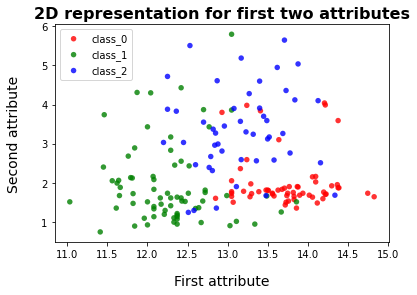

In [57]:
# Select the first two attributes for a 2D representation of the image

import matplotlib.pyplot as plt

first_two_attributes = pd.DataFrame({'First_feature' : attributes[0], 'Second_feature' : attributes[1], 'Class' : targets})

mask_0 = (first_two_attributes['Class'] == 0)
mask_1 = (first_two_attributes['Class'] == 1)
mask_2 = (first_two_attributes['Class'] == 2)

g0 = (first_two_attributes.loc[mask_0, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_0, 'Second_feature'].to_numpy())
g1 = (first_two_attributes.loc[mask_1, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_1, 'Second_feature'].to_numpy())
g2 = (first_two_attributes.loc[mask_2, 'First_feature'].to_numpy(), first_two_attributes.loc[mask_2, 'Second_feature'].to_numpy())

data = (g0, g1, g2)
colors = ("red", "green", "blue")
groups = (target_names.values[0], target_names.values[1], target_names.values[2])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

plt.title('2D representation for first two attributes', size=16, weight='bold')
plt.legend(loc=2)
plt.xlabel('First attribute', labelpad=15, size=14, weight='medium')
plt.ylabel('Second attribute', labelpad=20, size=14, weight='medium')
plt.show()

In [58]:
# Randomly split data into train, validation and test sets in proportion 5:2:3 (and Standardization)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

max_1 = attributes[0].max()
min_1 = attributes[0].min()
max_2 = attributes[1].max()
min_2 = attributes[1].min()
mean_1 = attributes[0].mean()
mean_2 = attributes[1].mean()
std_1 = attributes[0].std()
std_2 = attributes[1].std()

print("First attribute -> Max_value = " + str(max_1) + ", Min_value = " + str(min_1) + ", mean = {0:.2f}, std = {1:.2f}".format(mean_1, std_1))
print("Second attribute -> Max_value = " + str(max_2) + ", Min_value = " + str(min_2) + ", mean = {0:.2f}, std = {1:.2f}".format(mean_2, std_2))
print("\nAs we can see, first attribute values and second attribute values are different of one order of magnitude, so we have to apply Standardization to data")

X_train, X_val, y_train, y_val = train_test_split(attributes, targets, test_size=0.5, random_state=56, stratify=targets, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.6, random_state=32, stratify=y_val, shuffle=True)

print("Class distribution in the sets:\n")

print("Training set\n")
print(y_train.value_counts(sort=False))
print("Validation set\n")
print(y_val.value_counts(sort=False))
print("Test set")
print(y_test.value_counts(sort=False))

X_train_val = pd.concat((X_train, X_val))
y_train_val = pd.concat((y_train, y_val))

First attribute -> Max_value = 14.83, Min_value = 11.03, mean = 13.00, std = 0.81
Second attribute -> Max_value = 5.8, Min_value = 0.74, mean = 2.34, std = 1.12

As we can see, first attribute values and second attribute values are different of one order of magnitude, so we have to apply Standardization to data
Class distribution in the sets:

Training set

0    30
1    35
2    24
dtype: int64
Validation set

0    11
1    14
2    10
dtype: int64
Test set
0    18
1    22
2    14
dtype: int64


In [59]:
# Function to perform all the classifiers

from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

def apply_classifier(clf, params, X_train, y_train, X_val, y_val, i):
    
    scores = {}
    scores_list = []

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#0000FF'])
    
    # Standardization

    scaler = StandardScaler()

    scaler.fit(X_train)

    X_train = pd.DataFrame(scaler.transform(X_train))
    X_val = pd.DataFrame(scaler.transform(X_val))

    for p in params:
        # a. Apply the classifier
        
        if i == 0:
            d = {'n_neighbors': p}
        elif i == 1:
            d = {'C': p, 'max_iter': 1e7}
        elif i == 2:
            d = {'C': p, 'kernel':'rbf', 'gamma':'scale'}
            
        clf.set_params(**d)
        clf.fit(X_train[[0, 1]], y_train)

        # Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_train[[0]].to_numpy().min() - 1, X_train[[0]].to_numpy().max() + 1
        y_min, y_max = X_train[[1]].to_numpy().min() - 1, X_train[[1]].to_numpy().max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))

        # Predict class using data and the classifier
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points

        #plt.contour(xx, yy, Z, colors='black', alpha=0.8, linewidths=0.5) #- option for contours among classes
        plt.scatter(X_train[[0]].to_numpy(), X_train[[1]].to_numpy(), c=np.c_[y_train], cmap=cmap_bold, edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        if i == 0:
            plt.title("k = %d" % p, size=16, weight='bold');
        else:
            plt.title("C = %.3f" % p, size=16, weight='bold');
        plt.xlabel('First attribute', labelpad=15, size=14, weight='medium')
        plt.ylabel('Second attribute', labelpad=10, size=14, weight='medium')
        plt.show()
        y_pred = clf.predict(X_val[[0,1]])
        scores[p] = metrics.accuracy_score(y_val, y_pred) * 100
        scores_list.append(metrics.accuracy_score(y_val, y_pred) * 100)
        if i == 0:
            print('Apply K-Nearest Neighbors with K = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
        elif i == 1:
            print('Apply Linear SVM with C = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
        elif i == 2:
            print('Apply RBF Kernel with C = ' + str(p) + ' -> Accuracy = ' + str(metrics.accuracy_score(y_val, y_pred)*100))
    
    return scores, scores_list

/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


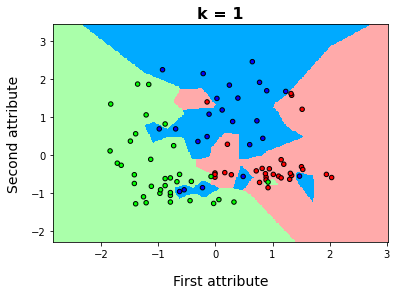

Apply K-Nearest Neighbors with K = 1 -> Accuracy = 71.42857142857143


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


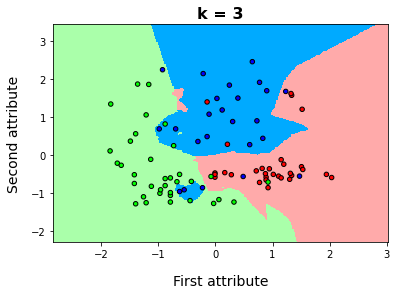

Apply K-Nearest Neighbors with K = 3 -> Accuracy = 77.14285714285715


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


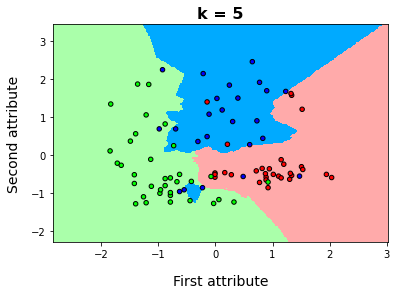

Apply K-Nearest Neighbors with K = 5 -> Accuracy = 80.0


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


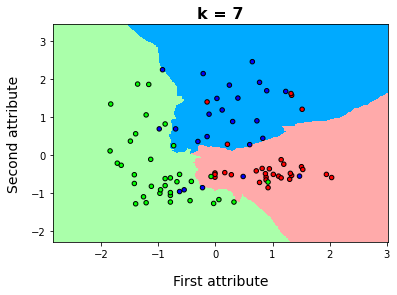

Apply K-Nearest Neighbors with K = 7 -> Accuracy = 82.85714285714286


In [60]:
# Apply K-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

K = [1, 3, 5, 7]
knn = KNeighborsClassifier()

knn_scores, knn_scores_list = apply_classifier(knn, K, X_train, y_train, X_val, y_val, 0)

In [61]:
# Function to plot the accuracy

def plot_accuracy(params, scores_list, i):
    np_scores = np.array(scores_list)
    plt.figure()
    plt.grid(axis='y')
    if i == 0:
        plt.xticks(params)
    plt.ylim(np_scores.min() - 5, np_scores.max() + 5)
    plt.plot(params, scores_list, color='navy', linestyle='solid')
    plt.title("Accuracy on Validation", size=16, weight='bold')
    if i == 0:
        plt.xlabel("Value of K", labelpad=15, size=14, weight='medium')
    else:
        plt.xlabel("Value of C", labelpad=15, size=14, weight='medium')
    plt.ylabel("Accuracy percentage %", labelpad=20, size=14, weight='medium')
    plt.show()
    
    return;

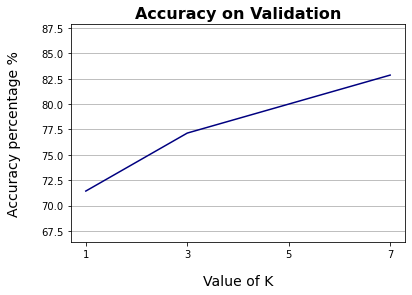

In [62]:
# Plot a graph showing how the accuracy on the validation set varies when changing K

plot_accuracy(K, knn_scores_list, 0)

In [64]:
# How do the boundaries change?

print("\nThe higher is the value of K and less is the possibility to have misclassification, as we can see in the graphs\n")


The higher is the value of K and less is the possibility to have misclassification, as we can see in the graphs



In [65]:
# Function to evaluate the model on the test set using best parameters

def evaluate_best (scores, clf, X_train_val, X_test, y_train_val, y_test, i):
    best_p = max(scores, key=scores.get)
    if i == 0:
        d = {'n_neighbors': best_p}
    elif i == 1:
        d = {'C': best_p, 'max_iter': 1e7}
    elif i == 2:
        d = {'C': best_p, 'kernel': 'rbf', 'gamma': 'scale'}
            
    clf.set_params(**d)
    
    scaler = StandardScaler()
    scaler.fit(X_train_val)
    X_train_val = pd.DataFrame(scaler.transform(X_train_val))
    X_test = pd.DataFrame(scaler.transform(X_test))

    clf.fit(X_train_val[[0, 1]], y_train_val)
    y_pred_test = clf.predict(X_test[[0,1]])
    
    if i == 0:
        print('Apply K-Nearest Neighbors with best K = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    elif i == 1:
        print('Apply Linear SVM with best C = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    elif i == 2:
        print('Apply RBF Kernel with best C = ' + str(best_p) + ' on test set -> Accuracy = ' + str(metrics.accuracy_score(y_test, y_pred_test)*100))
    

In [66]:
# Use the best value of K and evaluate the model on the test set

evaluate_best(knn_scores, knn, X_train_val, X_test, y_train_val, y_test, 0)


Apply K-Nearest Neighbors with best K = 7 on test set -> Accuracy = 75.92592592592592


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


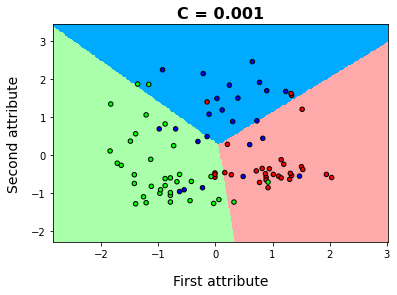

Apply Linear SVM with C = 0.001 -> Accuracy = 77.14285714285715


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


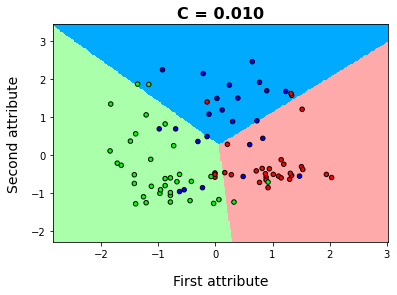

Apply Linear SVM with C = 0.01 -> Accuracy = 77.14285714285715


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


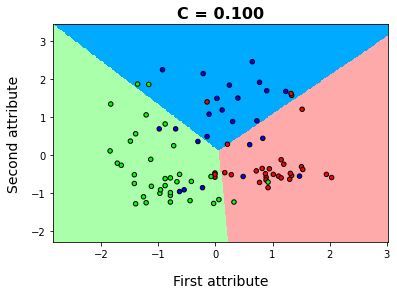

Apply Linear SVM with C = 0.1 -> Accuracy = 80.0


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


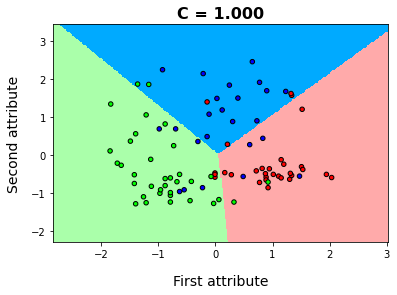

Apply Linear SVM with C = 1 -> Accuracy = 80.0


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


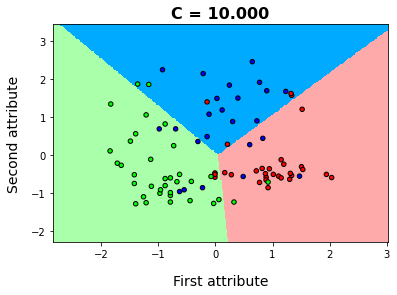

Apply Linear SVM with C = 10 -> Accuracy = 80.0


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


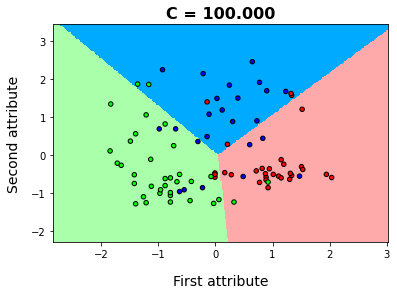

Apply Linear SVM with C = 100 -> Accuracy = 80.0


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


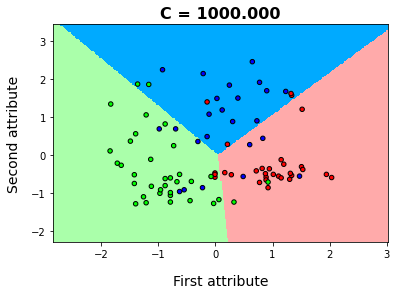

Apply Linear SVM with C = 1000 -> Accuracy = 80.0


In [67]:
# Apply Linear SVM classifier

from sklearn.svm import LinearSVC

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_SVM = LinearSVC()

SVM_scores, SVM_scores_list = apply_classifier(linear_SVM, C, X_train, y_train, X_val, y_val, 1)

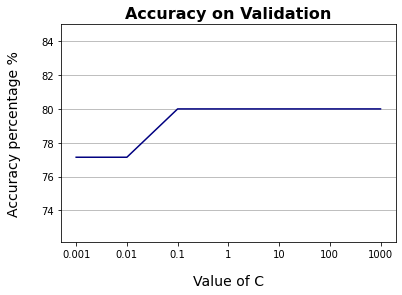

In [68]:
# Plot a graph showing how the accuracy on the validation set varies when changing C

C_text = ['0.001', '0.01', '0.1', '1', '10', '100', '1000']
plot_accuracy(C_text, SVM_scores_list, 1)

In [69]:
# Use the best value of C and evaluate the model on the test set

evaluate_best(SVM_scores, linear_SVM, X_train_val, X_test, y_train_val, y_test, 1)

Apply Linear SVM with best C = 0.1 on test set -> Accuracy = 79.62962962962963


In [70]:
from sklearn.feature_selection import SelectKBest, f_classif
from numpy import set_printoptions

def choose_different_pairs(X, y):
    X_new = pd.DataFrame(SelectKBest(f_classif, k=2).fit_transform(X, y))
    return X_new

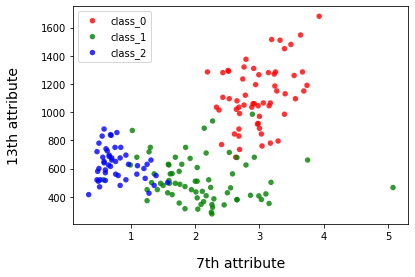

In [71]:
# Choose different pairs

best_attributes = choose_different_pairs(attributes, targets)

# features 6 and 12 are chosen (the seventh and the last)

two_attributes = pd.DataFrame({'First_feature' : attributes[6], 'Second_feature' : attributes[12], 'Class' : targets})

mask_0 = (two_attributes['Class'] == 0)
mask_1 = (two_attributes['Class'] == 1)
mask_2 = (two_attributes['Class'] == 2)

g0 = (two_attributes.loc[mask_0, 'First_feature'].to_numpy(), two_attributes.loc[mask_0, 'Second_feature'].to_numpy())
g1 = (two_attributes.loc[mask_1, 'First_feature'].to_numpy(), two_attributes.loc[mask_1, 'Second_feature'].to_numpy())
g2 = (two_attributes.loc[mask_2, 'First_feature'].to_numpy(), two_attributes.loc[mask_2, 'Second_feature'].to_numpy())

data = (g0, g1, g2)
colors = ("red", "green", "blue")
groups = (target_names.values[0], target_names.values[1], target_names.values[2])

# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

#plt.title('2D representation for first two attributes', size=16, weight='bold')
plt.legend(loc=2)
plt.xlabel('7th attribute', labelpad=15, size=14, weight='medium')
plt.ylabel('13th attribute', labelpad=20, size=14, weight='medium')
plt.show()

X_train, X_val, y_train, y_val = train_test_split(best_attributes, targets, test_size=0.5, random_state=56, stratify=targets, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.6, random_state=32, stratify=y_val, shuffle=True)

X_train_val = pd.concat((X_train, X_val))
y_train_val = pd.concat((y_train, y_val))

/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


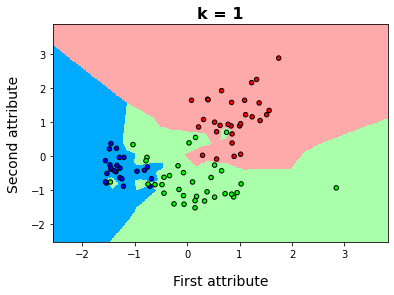

Apply K-Nearest Neighbors with K = 1 -> Accuracy = 88.57142857142857


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


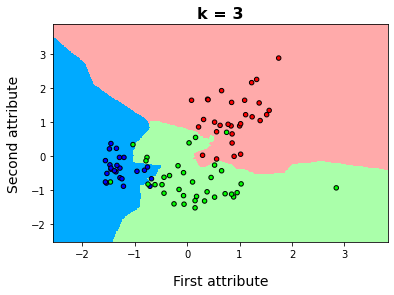

Apply K-Nearest Neighbors with K = 3 -> Accuracy = 91.42857142857143


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


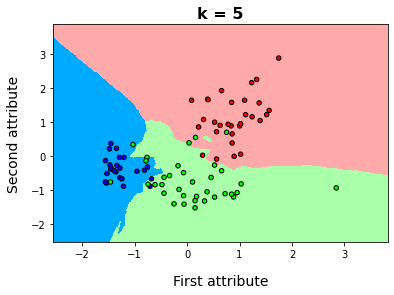

Apply K-Nearest Neighbors with K = 5 -> Accuracy = 85.71428571428571


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


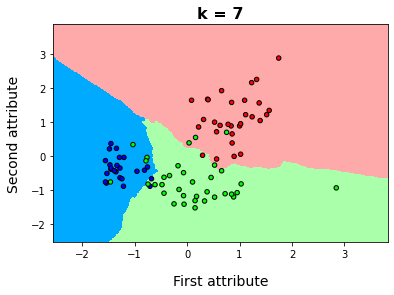

Apply K-Nearest Neighbors with K = 7 -> Accuracy = 88.57142857142857
Apply K-Nearest Neighbors with best K = 3 on test set -> Accuracy = 90.74074074074075


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


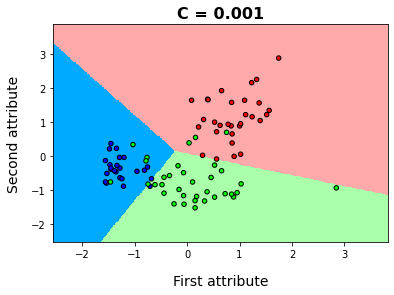

Apply Linear SVM with C = 0.001 -> Accuracy = 91.42857142857143


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


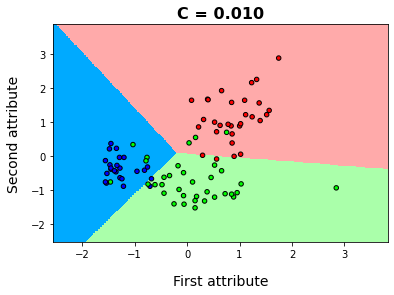

Apply Linear SVM with C = 0.01 -> Accuracy = 91.42857142857143


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


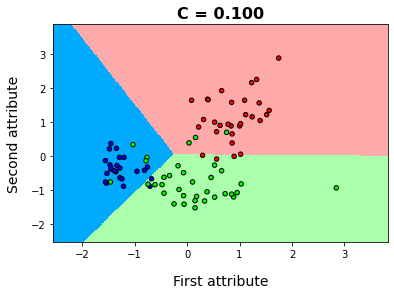

Apply Linear SVM with C = 0.1 -> Accuracy = 94.28571428571428


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


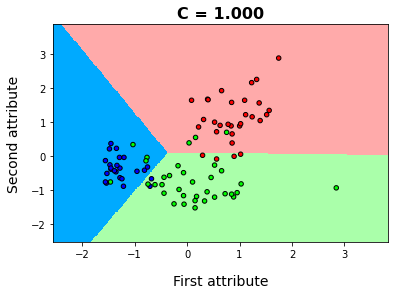

Apply Linear SVM with C = 1 -> Accuracy = 94.28571428571428


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


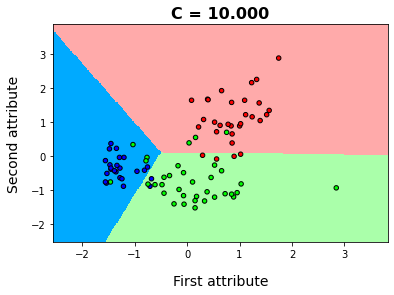

Apply Linear SVM with C = 10 -> Accuracy = 94.28571428571428


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


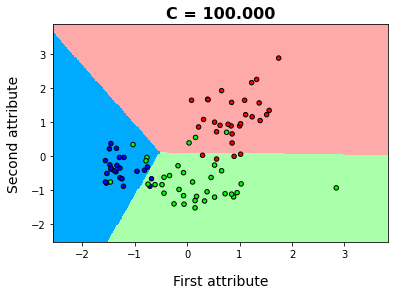

Apply Linear SVM with C = 100 -> Accuracy = 94.28571428571428


/home/giulia/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


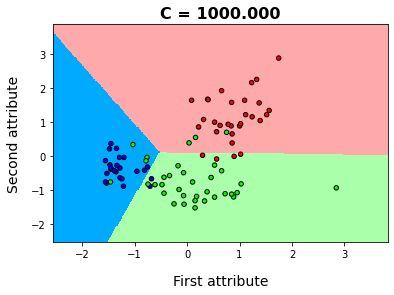

Apply Linear SVM with C = 1000 -> Accuracy = 94.28571428571428
Apply Linear SVM with best C = 0.1 on test set -> Accuracy = 92.5925925925926


In [72]:
# Apply K-Nearest Neighbors

K = [1, 3, 5, 7]
knn = KNeighborsClassifier()

knn_scores, knn_scores_list = apply_classifier(knn, K, X_train, y_train, X_val, y_val, 0)
evaluate_best(knn_scores, knn, X_train_val, X_test, y_train_val, y_test, 0)

# Apply Linear SVM classifier

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
linear_SVM = LinearSVC()

SVM_scores, SVM_scores_list = apply_classifier(linear_SVM, C, X_train, y_train, X_val, y_val, 1)
evaluate_best(SVM_scores, linear_SVM, X_train_val, X_test, y_train_val, y_test, 1)